###Holly Figueroa
###DSC650 Week 5  

**Book Exercise 3.4**

In [74]:
from keras.src.engine.sequential import Sequential
from keras.datasets import imdb
import numpy as np
from keras import layers
from keras.models import Sequential

In [75]:
# Load data
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [76]:
# Encode the integer sequences into a binary matrix
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [77]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [78]:
# Vectorize labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [79]:
# define model
model=Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [80]:
# Vaidate - create validation set
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [86]:
# Model training
model.compile(optimizer =  'rmsprop',
              loss = 'binary_crossentropy',
              metrics =['acc'])


In [82]:
epochs = 20
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=epochs,
                    batch_size=512,
                    validation_data=(x_val,y_val))

Epoch 1/20
30/30 [==============================] - 7s 172ms/step - loss: 0.5391 - acc: 0.7694 - val_loss: 0.4462 - val_acc: 0.8117
Epoch 2/20
30/30 [==============================] - 2s 65ms/step - loss: 0.3337 - acc: 0.8915 - val_loss: 0.3306 - val_acc: 0.8747
Epoch 3/20
30/30 [==============================] - 2s 53ms/step - loss: 0.2503 - acc: 0.9190 - val_loss: 0.3008 - val_acc: 0.8807
Epoch 4/20
30/30 [==============================] - 1s 46ms/step - loss: 0.2019 - acc: 0.9332 - val_loss: 0.2761 - val_acc: 0.8893
Epoch 5/20
30/30 [==============================] - 1s 37ms/step - loss: 0.1711 - acc: 0.9445 - val_loss: 0.2765 - val_acc: 0.8877
Epoch 6/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1447 - acc: 0.9541 - val_loss: 0.2826 - val_acc: 0.8861
Epoch 7/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1252 - acc: 0.9611 - val_loss: 0.2915 - val_acc: 0.8855
Epoch 8/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1066 - 

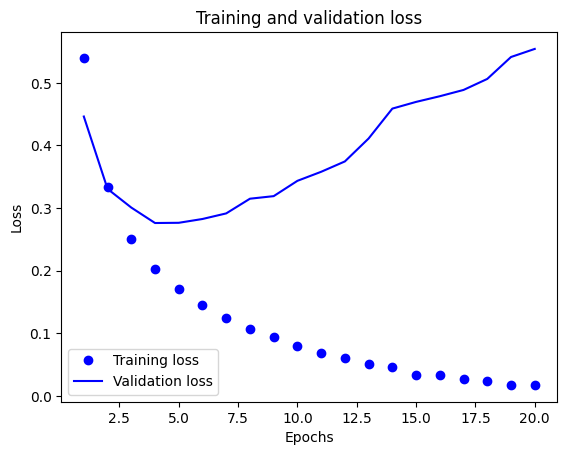

In [83]:
# Plotting training and validation loss
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

# Create axis range based on epochs
x_axis = [i for i in range(1, epochs+1)]

plt.plot(x_axis, loss_values,'bo', label='Training loss')
plt.plot(x_axis, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


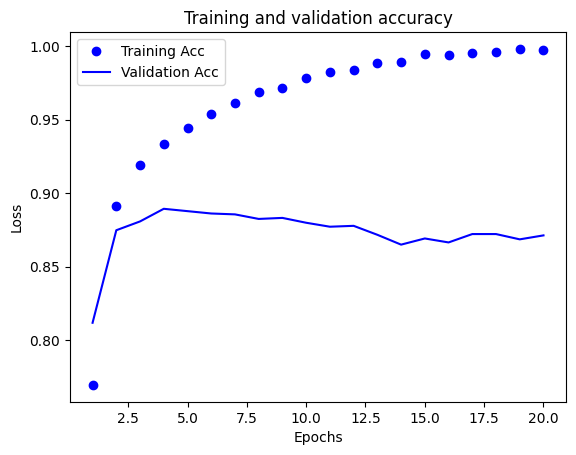

In [84]:
# Plot training and validation accuracy
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(x_axis, acc_values,'bo', label='Training Acc')
plt.plot(x_axis, val_acc_values, 'b', label='Validation Acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [87]:
# define new model
model=Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))



In [88]:
# Model training
model.compile(optimizer =  'rmsprop',
              loss = 'binary_crossentropy',
              metrics =['acc'])

model.fit(x_train,y_train, epochs=4, batch_size=512)

# Results
results = model.evaluate(x_test,y_test)
results

Epoch 1/4
49/49 [==============================] - 5s 57ms/step - loss: 0.4693 - acc: 0.8157
Epoch 2/4
49/49 [==============================] - 2s 34ms/step - loss: 0.2784 - acc: 0.9013
Epoch 3/4
49/49 [==============================] - 1s 24ms/step - loss: 0.2192 - acc: 0.9209
Epoch 4/4
782/782 [==============================] - 3s 3ms/step - loss: 0.2867 - acc: 0.8845


[0.2866801917552948, 0.8844799995422363]